# Neural Net to Classify Fetal Health

Note: The resources used while building this model are as follows:
1. https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

# Imports

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sb

# Data

In [3]:
data = pd.read_csv("./fetal_health.csv")

encoder = LabelEncoder()
encoder.fit(data["fetal_health"])
encodedY = encoder.transform(data["fetal_health"])
dummy_y = np_utils.to_categorical(encodedY)

print(dummy_y)

data.head()
data.describe()

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


# Scaling

In [4]:
scaler = StandardScaler()

scaler.fit(data.drop('fetal_health', axis=1))
scaled_features = scaler.transform(data.drop('fetal_health', axis=1))

data_features = pd.DataFrame(scaled_features, columns = data.columns[:-1])
data_features.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


# Create Model

In [5]:
model = keras.models.Sequential()

model.add(keras.Input(shape=(21,)))
model.add(layers.Dense(21, activation="relu"))
model.add(layers.Dense(42, activation="relu"))
model.add(layers.Dense(21, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))

model.summary()

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 21)                462       
_________________________________________________________________
dense_1 (Dense)              (None, 42)                924       
_________________________________________________________________
dense_2 (Dense)              (None, 21)                903       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 66        
Total params: 2,355
Trainable params: 2,355
Non-trainable params: 0
_________________________________________________________________


# Training

In [16]:
# Split out train data, 80%, and the rest, 20%
X_train, X_rest, Y_train, Y_rest = train_test_split(data_features, dummy_y, test_size=0.20, random_state=33)
# Spit out validate data, 15% (of total, 75% of X_rest), and test, 5% (of total, 25% of rest)
X_validate, X_test, Y_validate, Y_test = train_test_split(X_rest, Y_rest, test_size=0.25, random_state=33)

training = model.fit(X_train, Y_train, batch_size=128, verbose=1, epochs=1000, validation_data=(X_validate,Y_validate))

score = model.evaluate(X_validate, Y_validate, verbose=0, batch_size=32)

print("Validate loss:", score[0])
print("Validate accuracy:", score[1])

Epoch 1/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0729 - accuracy: 0.9718 - val_loss: 0.1479 - val_accuracy: 0.9436
Epoch 2/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0730 - accuracy: 0.9753 - val_loss: 0.1446 - val_accuracy: 0.9436
Epoch 3/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0724 - accuracy: 0.9724 - val_loss: 0.1485 - val_accuracy: 0.9404
Epoch 4/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0724 - accuracy: 0.9729 - val_loss: 0.1457 - val_accuracy: 0.9404
Epoch 5/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.0728 - accuracy: 0.9735 - val_loss: 0.1491 - val_accuracy: 0.9404
Epoch 6/1000
14/14 [==============================] - 0s 13ms/step - loss: 0.0725 - accuracy: 0.9747 - val_loss: 0.1480 - val_accuracy: 0.9404
Epoch 7/1000
14/14 [==============================] - 0s 14ms/step - loss: 0.0730 - accuracy: 0.9706 - val_loss: 0.1494 - val_accuracy: 0.9436


14/14 [==============================] - 0s 9ms/step - loss: 0.0684 - accuracy: 0.9735 - val_loss: 0.1498 - val_accuracy: 0.9498
Epoch 59/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0693 - accuracy: 0.9747 - val_loss: 0.1488 - val_accuracy: 0.9467
Epoch 60/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0691 - accuracy: 0.9706 - val_loss: 0.1461 - val_accuracy: 0.9467
Epoch 61/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0683 - accuracy: 0.9753 - val_loss: 0.1468 - val_accuracy: 0.9436
Epoch 62/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.0686 - accuracy: 0.9741 - val_loss: 0.1460 - val_accuracy: 0.9467
Epoch 63/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.0683 - accuracy: 0.9759 - val_loss: 0.1503 - val_accuracy: 0.9467
Epoch 64/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.0682 - accuracy: 0.9759 - val_loss: 0.1462 - val_accuracy: 0.9467
Epoch 65/1000

14/14 [==============================] - 0s 13ms/step - loss: 0.0644 - accuracy: 0.9782 - val_loss: 0.1491 - val_accuracy: 0.9498
Epoch 116/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0647 - accuracy: 0.9782 - val_loss: 0.1468 - val_accuracy: 0.9467
Epoch 117/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0642 - accuracy: 0.9782 - val_loss: 0.1516 - val_accuracy: 0.9498
Epoch 118/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0643 - accuracy: 0.9776 - val_loss: 0.1466 - val_accuracy: 0.9467
Epoch 119/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0649 - accuracy: 0.9771 - val_loss: 0.1500 - val_accuracy: 0.9436
Epoch 120/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0648 - accuracy: 0.9765 - val_loss: 0.1494 - val_accuracy: 0.9498
Epoch 121/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.0659 - accuracy: 0.9771 - val_loss: 0.1481 - val_accuracy: 0.9498
Epo

Epoch 172/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0602 - accuracy: 0.9782 - val_loss: 0.1484 - val_accuracy: 0.9498
Epoch 173/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0612 - accuracy: 0.9788 - val_loss: 0.1506 - val_accuracy: 0.9561
Epoch 174/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0608 - accuracy: 0.9788 - val_loss: 0.1522 - val_accuracy: 0.9467
Epoch 175/1000
14/14 [==============================] - 0s 13ms/step - loss: 0.0605 - accuracy: 0.9776 - val_loss: 0.1536 - val_accuracy: 0.9467
Epoch 176/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0593 - accuracy: 0.9771 - val_loss: 0.1509 - val_accuracy: 0.9498
Epoch 177/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.0618 - accuracy: 0.9765 - val_loss: 0.1493 - val_accuracy: 0.9498
Epoch 178/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0599 - accuracy: 0.9800 - val_loss: 0.1514 - val_acc

14/14 [==============================] - 0s 24ms/step - loss: 0.0575 - accuracy: 0.9800 - val_loss: 0.1537 - val_accuracy: 0.9467
Epoch 229/1000
14/14 [==============================] - 0s 33ms/step - loss: 0.0563 - accuracy: 0.9800 - val_loss: 0.1533 - val_accuracy: 0.9467
Epoch 230/1000
14/14 [==============================] - 0s 19ms/step - loss: 0.0558 - accuracy: 0.9782 - val_loss: 0.1512 - val_accuracy: 0.9467
Epoch 231/1000
14/14 [==============================] - 0s 16ms/step - loss: 0.0569 - accuracy: 0.9794 - val_loss: 0.1524 - val_accuracy: 0.9436
Epoch 232/1000
14/14 [==============================] - 0s 17ms/step - loss: 0.0565 - accuracy: 0.9794 - val_loss: 0.1521 - val_accuracy: 0.9498
Epoch 233/1000
14/14 [==============================] - 0s 17ms/step - loss: 0.0562 - accuracy: 0.9812 - val_loss: 0.1523 - val_accuracy: 0.9436
Epoch 234/1000
14/14 [==============================] - 0s 20ms/step - loss: 0.0558 - accuracy: 0.9800 - val_loss: 0.1540 - val_accuracy: 0.9561


14/14 [==============================] - 0s 21ms/step - loss: 0.0531 - accuracy: 0.9818 - val_loss: 0.1538 - val_accuracy: 0.9530
Epoch 285/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.0532 - accuracy: 0.9800 - val_loss: 0.1541 - val_accuracy: 0.9467
Epoch 286/1000
14/14 [==============================] - 0s 16ms/step - loss: 0.0526 - accuracy: 0.9824 - val_loss: 0.1586 - val_accuracy: 0.9530
Epoch 287/1000
14/14 [==============================] - 0s 14ms/step - loss: 0.0532 - accuracy: 0.9824 - val_loss: 0.1533 - val_accuracy: 0.9498
Epoch 288/1000
14/14 [==============================] - 0s 16ms/step - loss: 0.0521 - accuracy: 0.9853 - val_loss: 0.1568 - val_accuracy: 0.9436
Epoch 289/1000
14/14 [==============================] - 0s 14ms/step - loss: 0.0523 - accuracy: 0.9818 - val_loss: 0.1548 - val_accuracy: 0.9467
Epoch 290/1000
14/14 [==============================] - 0s 15ms/step - loss: 0.0526 - accuracy: 0.9818 - val_loss: 0.1536 - val_accuracy: 0.9498


14/14 [==============================] - 0s 13ms/step - loss: 0.0506 - accuracy: 0.9829 - val_loss: 0.1571 - val_accuracy: 0.9467
Epoch 341/1000
14/14 [==============================] - 0s 14ms/step - loss: 0.0495 - accuracy: 0.9853 - val_loss: 0.1598 - val_accuracy: 0.9498
Epoch 342/1000
14/14 [==============================] - 0s 13ms/step - loss: 0.0492 - accuracy: 0.9847 - val_loss: 0.1576 - val_accuracy: 0.9530
Epoch 343/1000
14/14 [==============================] - 0s 13ms/step - loss: 0.0487 - accuracy: 0.9841 - val_loss: 0.1617 - val_accuracy: 0.9592
Epoch 344/1000
14/14 [==============================] - 0s 16ms/step - loss: 0.0500 - accuracy: 0.9824 - val_loss: 0.1566 - val_accuracy: 0.9467
Epoch 345/1000
14/14 [==============================] - 0s 14ms/step - loss: 0.0496 - accuracy: 0.9859 - val_loss: 0.1644 - val_accuracy: 0.9530
Epoch 346/1000
14/14 [==============================] - 0s 13ms/step - loss: 0.0497 - accuracy: 0.9853 - val_loss: 0.1584 - val_accuracy: 0.9530


14/14 [==============================] - 0s 15ms/step - loss: 0.0455 - accuracy: 0.9847 - val_loss: 0.1598 - val_accuracy: 0.9498
Epoch 397/1000
14/14 [==============================] - 0s 18ms/step - loss: 0.0465 - accuracy: 0.9847 - val_loss: 0.1571 - val_accuracy: 0.9498
Epoch 398/1000
14/14 [==============================] - 0s 13ms/step - loss: 0.0458 - accuracy: 0.9859 - val_loss: 0.1614 - val_accuracy: 0.9467
Epoch 399/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.0458 - accuracy: 0.9853 - val_loss: 0.1609 - val_accuracy: 0.9467
Epoch 400/1000
14/14 [==============================] - 0s 14ms/step - loss: 0.0450 - accuracy: 0.9865 - val_loss: 0.1605 - val_accuracy: 0.9498
Epoch 401/1000
14/14 [==============================] - 0s 15ms/step - loss: 0.0464 - accuracy: 0.9841 - val_loss: 0.1604 - val_accuracy: 0.9467
Epoch 402/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.0456 - accuracy: 0.9865 - val_loss: 0.1683 - val_accuracy: 0.9498


14/14 [==============================] - 0s 24ms/step - loss: 0.0421 - accuracy: 0.9888 - val_loss: 0.1637 - val_accuracy: 0.9530
Epoch 453/1000
14/14 [==============================] - 0s 20ms/step - loss: 0.0423 - accuracy: 0.9871 - val_loss: 0.1627 - val_accuracy: 0.9498
Epoch 454/1000
14/14 [==============================] - 0s 19ms/step - loss: 0.0419 - accuracy: 0.9853 - val_loss: 0.1669 - val_accuracy: 0.9530
Epoch 455/1000
14/14 [==============================] - 0s 17ms/step - loss: 0.0433 - accuracy: 0.9859 - val_loss: 0.1657 - val_accuracy: 0.9467
Epoch 456/1000
14/14 [==============================] - 0s 14ms/step - loss: 0.0426 - accuracy: 0.9876 - val_loss: 0.1742 - val_accuracy: 0.9530
Epoch 457/1000
14/14 [==============================] - 0s 28ms/step - loss: 0.0421 - accuracy: 0.9882 - val_loss: 0.1626 - val_accuracy: 0.9467
Epoch 458/1000
14/14 [==============================] - 0s 15ms/step - loss: 0.0419 - accuracy: 0.9888 - val_loss: 0.1632 - val_accuracy: 0.9498


14/14 [==============================] - 0s 15ms/step - loss: 0.0405 - accuracy: 0.9859 - val_loss: 0.1739 - val_accuracy: 0.9530
Epoch 509/1000
14/14 [==============================] - 0s 13ms/step - loss: 0.0398 - accuracy: 0.9906 - val_loss: 0.1703 - val_accuracy: 0.9498
Epoch 510/1000
14/14 [==============================] - 0s 16ms/step - loss: 0.0399 - accuracy: 0.9865 - val_loss: 0.1684 - val_accuracy: 0.9467
Epoch 511/1000
14/14 [==============================] - 0s 14ms/step - loss: 0.0397 - accuracy: 0.9888 - val_loss: 0.1679 - val_accuracy: 0.9467
Epoch 512/1000
14/14 [==============================] - 0s 17ms/step - loss: 0.0398 - accuracy: 0.9888 - val_loss: 0.1693 - val_accuracy: 0.9498
Epoch 513/1000
14/14 [==============================] - 0s 14ms/step - loss: 0.0394 - accuracy: 0.9906 - val_loss: 0.1687 - val_accuracy: 0.9467
Epoch 514/1000
14/14 [==============================] - 0s 14ms/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.1674 - val_accuracy: 0.9467


14/14 [==============================] - 0s 18ms/step - loss: 0.0368 - accuracy: 0.9918 - val_loss: 0.1790 - val_accuracy: 0.9467
Epoch 565/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.9906 - val_loss: 0.1762 - val_accuracy: 0.9467
Epoch 566/1000
14/14 [==============================] - 0s 16ms/step - loss: 0.0369 - accuracy: 0.9912 - val_loss: 0.1774 - val_accuracy: 0.9467
Epoch 567/1000
14/14 [==============================] - 0s 21ms/step - loss: 0.0367 - accuracy: 0.9888 - val_loss: 0.1789 - val_accuracy: 0.9467
Epoch 568/1000
14/14 [==============================] - 0s 17ms/step - loss: 0.0358 - accuracy: 0.9924 - val_loss: 0.1827 - val_accuracy: 0.9498
Epoch 569/1000
14/14 [==============================] - 0s 16ms/step - loss: 0.0384 - accuracy: 0.9882 - val_loss: 0.1837 - val_accuracy: 0.9530
Epoch 570/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.0374 - accuracy: 0.9894 - val_loss: 0.1760 - val_accuracy: 0.9467


14/14 [==============================] - 0s 28ms/step - loss: 0.0336 - accuracy: 0.9924 - val_loss: 0.1823 - val_accuracy: 0.9467
Epoch 621/1000
14/14 [==============================] - 0s 17ms/step - loss: 0.0345 - accuracy: 0.9935 - val_loss: 0.1842 - val_accuracy: 0.9436
Epoch 622/1000
14/14 [==============================] - 0s 17ms/step - loss: 0.0338 - accuracy: 0.9912 - val_loss: 0.1794 - val_accuracy: 0.9467
Epoch 623/1000
14/14 [==============================] - 0s 20ms/step - loss: 0.0344 - accuracy: 0.9929 - val_loss: 0.1900 - val_accuracy: 0.9467
Epoch 624/1000
14/14 [==============================] - 0s 21ms/step - loss: 0.0346 - accuracy: 0.9918 - val_loss: 0.1888 - val_accuracy: 0.9530
Epoch 625/1000
14/14 [==============================] - 0s 31ms/step - loss: 0.0345 - accuracy: 0.9906 - val_loss: 0.1869 - val_accuracy: 0.9467
Epoch 626/1000
14/14 [==============================] - 0s 15ms/step - loss: 0.0337 - accuracy: 0.9929 - val_loss: 0.1828 - val_accuracy: 0.9404


14/14 [==============================] - 0s 22ms/step - loss: 0.0315 - accuracy: 0.9935 - val_loss: 0.1873 - val_accuracy: 0.9436
Epoch 677/1000
14/14 [==============================] - 0s 22ms/step - loss: 0.0315 - accuracy: 0.9924 - val_loss: 0.1873 - val_accuracy: 0.9467
Epoch 678/1000
14/14 [==============================] - 0s 18ms/step - loss: 0.0312 - accuracy: 0.9935 - val_loss: 0.1913 - val_accuracy: 0.9436
Epoch 679/1000
14/14 [==============================] - 0s 22ms/step - loss: 0.0315 - accuracy: 0.9947 - val_loss: 0.1894 - val_accuracy: 0.9467
Epoch 680/1000
14/14 [==============================] - 0s 22ms/step - loss: 0.0313 - accuracy: 0.9924 - val_loss: 0.1855 - val_accuracy: 0.9436
Epoch 681/1000
14/14 [==============================] - 0s 18ms/step - loss: 0.0321 - accuracy: 0.9935 - val_loss: 0.1922 - val_accuracy: 0.9498
Epoch 682/1000
14/14 [==============================] - 0s 19ms/step - loss: 0.0315 - accuracy: 0.9935 - val_loss: 0.1905 - val_accuracy: 0.9467


14/14 [==============================] - 0s 18ms/step - loss: 0.0292 - accuracy: 0.9941 - val_loss: 0.1946 - val_accuracy: 0.9404
Epoch 733/1000
14/14 [==============================] - 0s 13ms/step - loss: 0.0296 - accuracy: 0.9941 - val_loss: 0.1979 - val_accuracy: 0.9498
Epoch 734/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0296 - accuracy: 0.9941 - val_loss: 0.1940 - val_accuracy: 0.9498
Epoch 735/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.0295 - accuracy: 0.9953 - val_loss: 0.1920 - val_accuracy: 0.9467
Epoch 736/1000
14/14 [==============================] - 0s 19ms/step - loss: 0.0292 - accuracy: 0.9941 - val_loss: 0.1943 - val_accuracy: 0.9467
Epoch 737/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.0294 - accuracy: 0.9941 - val_loss: 0.2012 - val_accuracy: 0.9498
Epoch 738/1000
14/14 [==============================] - 0s 15ms/step - loss: 0.0298 - accuracy: 0.9929 - val_loss: 0.1923 - val_accuracy: 0.9436
E

14/14 [==============================] - 0s 9ms/step - loss: 0.0274 - accuracy: 0.9959 - val_loss: 0.2011 - val_accuracy: 0.9436
Epoch 789/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0275 - accuracy: 0.9941 - val_loss: 0.1997 - val_accuracy: 0.9404
Epoch 790/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0273 - accuracy: 0.9947 - val_loss: 0.2045 - val_accuracy: 0.9530
Epoch 791/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0278 - accuracy: 0.9941 - val_loss: 0.1989 - val_accuracy: 0.9436
Epoch 792/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0275 - accuracy: 0.9947 - val_loss: 0.2000 - val_accuracy: 0.9498
Epoch 793/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0266 - accuracy: 0.9947 - val_loss: 0.2002 - val_accuracy: 0.9436
Epoch 794/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.0276 - accuracy: 0.9941 - val_loss: 0.2017 - val_accuracy: 0.9404
Epoch

Epoch 845/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.0260 - accuracy: 0.9953 - val_loss: 0.2091 - val_accuracy: 0.9467
Epoch 846/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.0262 - accuracy: 0.9953 - val_loss: 0.2089 - val_accuracy: 0.9404
Epoch 847/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.0263 - accuracy: 0.9953 - val_loss: 0.2075 - val_accuracy: 0.9467
Epoch 848/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.0251 - accuracy: 0.9953 - val_loss: 0.2122 - val_accuracy: 0.9467
Epoch 849/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0250 - accuracy: 0.9965 - val_loss: 0.2098 - val_accuracy: 0.9467
Epoch 850/1000
14/14 [==============================] - 0s 13ms/step - loss: 0.0248 - accuracy: 0.9953 - val_loss: 0.2131 - val_accuracy: 0.9467
Epoch 851/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0255 - accuracy: 0.9953 - val_loss: 0.2075 - val_accurac

Epoch 902/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0245 - accuracy: 0.9941 - val_loss: 0.2213 - val_accuracy: 0.9498
Epoch 903/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.0245 - accuracy: 0.9947 - val_loss: 0.2175 - val_accuracy: 0.9467
Epoch 904/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.9947 - val_loss: 0.2170 - val_accuracy: 0.9467
Epoch 905/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0232 - accuracy: 0.9953 - val_loss: 0.2157 - val_accuracy: 0.9436
Epoch 906/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0233 - accuracy: 0.9965 - val_loss: 0.2142 - val_accuracy: 0.9436
Epoch 907/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0232 - accuracy: 0.9947 - val_loss: 0.2198 - val_accuracy: 0.9498
Epoch 908/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0239 - accuracy: 0.9941 - val_loss: 0.2207 - val_accura

Epoch 959/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0222 - accuracy: 0.9947 - val_loss: 0.2234 - val_accuracy: 0.9467
Epoch 960/1000
14/14 [==============================] - 0s 13ms/step - loss: 0.0226 - accuracy: 0.9953 - val_loss: 0.2210 - val_accuracy: 0.9436
Epoch 961/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.0220 - accuracy: 0.9947 - val_loss: 0.2227 - val_accuracy: 0.9467
Epoch 962/1000
14/14 [==============================] - 0s 23ms/step - loss: 0.0215 - accuracy: 0.9959 - val_loss: 0.2197 - val_accuracy: 0.9436
Epoch 963/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9959 - val_loss: 0.2217 - val_accuracy: 0.9436
Epoch 964/1000
14/14 [==============================] - 0s 13ms/step - loss: 0.0220 - accuracy: 0.9947 - val_loss: 0.2188 - val_accuracy: 0.9467
Epoch 965/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0221 - accuracy: 0.9953 - val_loss: 0.2215 - val_acc

       loss  accuracy  val_loss  val_accuracy
586  0.0358  0.992353  0.175227      0.943574


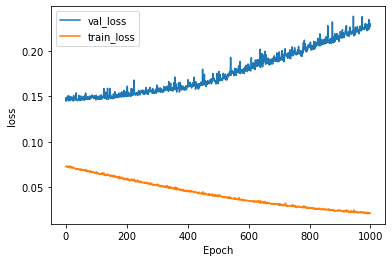

              precision    recall  f1-score   support

      normal       0.97      0.97      0.97       257
     suspect       0.84      0.78      0.81        40
pathological       0.88      0.95      0.91        22

    accuracy                           0.95       319
   macro avg       0.89      0.90      0.90       319
weighted avg       0.95      0.95      0.95       319



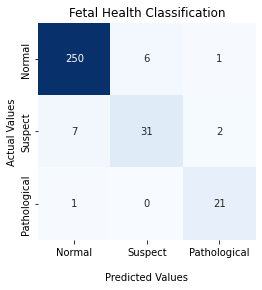

In [17]:
metrics_df = pd.DataFrame(training.history)
print(metrics_df.sample())

Y_pred_validate = model.predict(X_validate)
y_pred_c = np.argmax(Y_pred_validate, axis=1)
y_test_c = np.argmax(Y_validate, axis=1)

x = list(range(1000))
vy = training.history['val_loss']
ty = training.history['loss']

plt.plot( x, vy, label='val_loss')
plt.plot( x, ty, label='train_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

print(classification_report(y_test_c, y_pred_c, target_names=['normal', 'suspect', 'pathological'] ))

confusion = sb.heatmap(confusion_matrix(y_test_c, y_pred_c), square=True, annot=True, cmap='Blues', fmt='d', cbar=False )
confusion.set_title("Fetal Health Classification")
confusion.set_xlabel("\nPredicted Values")
confusion.set_ylabel("Actual Values")
confusion.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
confusion.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
plt.show()

# Testing

              precision    recall  f1-score   support

      normal       0.98      0.99      0.98        83
     suspect       0.87      0.76      0.81        17
pathological       0.75      0.86      0.80         7

    accuracy                           0.94       107
   macro avg       0.86      0.87      0.86       107
weighted avg       0.94      0.94      0.94       107



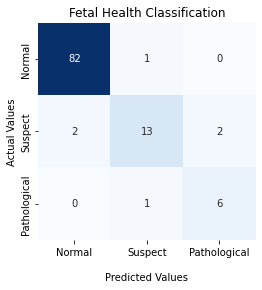

In [18]:
Y_pred_test = model.predict(X_test)
y_pred_c = np.argmax(Y_pred_test, axis=1)
y_test_c = np.argmax(Y_test, axis=1)

print(classification_report(y_test_c, y_pred_c, target_names=['normal', 'suspect', 'pathological'] ))

confusion = sb.heatmap(confusion_matrix(y_test_c, y_pred_c), square=True, annot=True, cmap='Blues', fmt='d', cbar=False )
confusion.set_title("Fetal Health Classification")
confusion.set_xlabel("\nPredicted Values")
confusion.set_ylabel("Actual Values")
confusion.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
confusion.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
plt.show()